In [57]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muratkokludataset_grapevine_leaves_image_dataset_path = kagglehub.dataset_download('muratkokludataset/grapevine-leaves-image-dataset')

print(muratkokludataset_grapevine_leaves_image_dataset_path)


/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os


from sklearn import model_selection
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [59]:
os.listdir("/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset")

['Dimnit',
 'Ak',
 'Nazli',
 'Ala_Idris',
 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt',
 'Buzgulu']

# **plot_imgs**

In [60]:
Ak_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset/Ak"
Ala_Idris_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset/Ala_Idris"
Buzgulu_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset/Buzgulu"
Dimnit_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset/Dimnit"
Nazli_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset/Nazli"

In [61]:
def plot_imgs(item_dir, num_imgs):

    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

# Ak

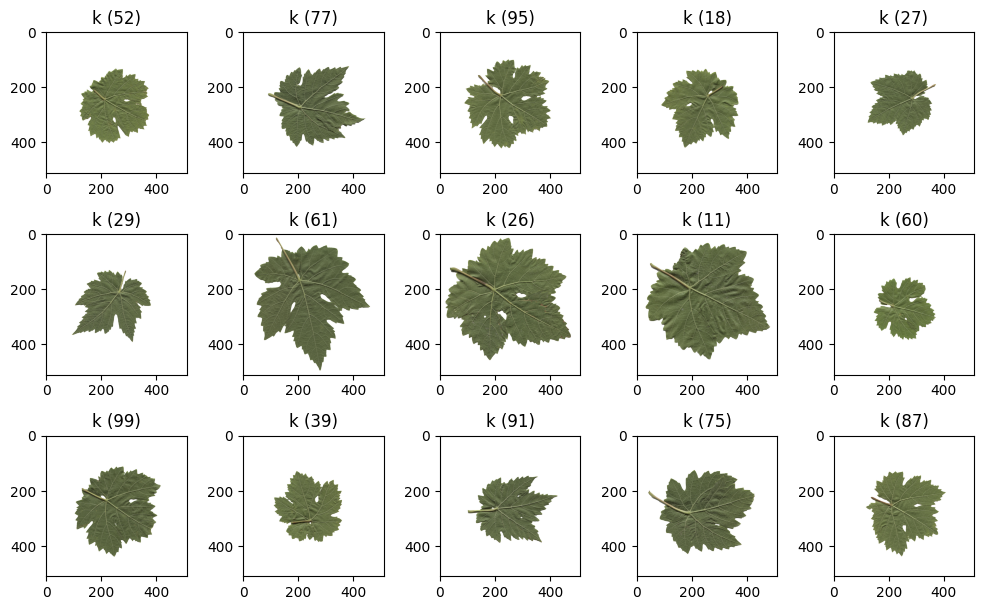

In [62]:
plot_imgs(Ak_path, 15)

# Ala_Idris

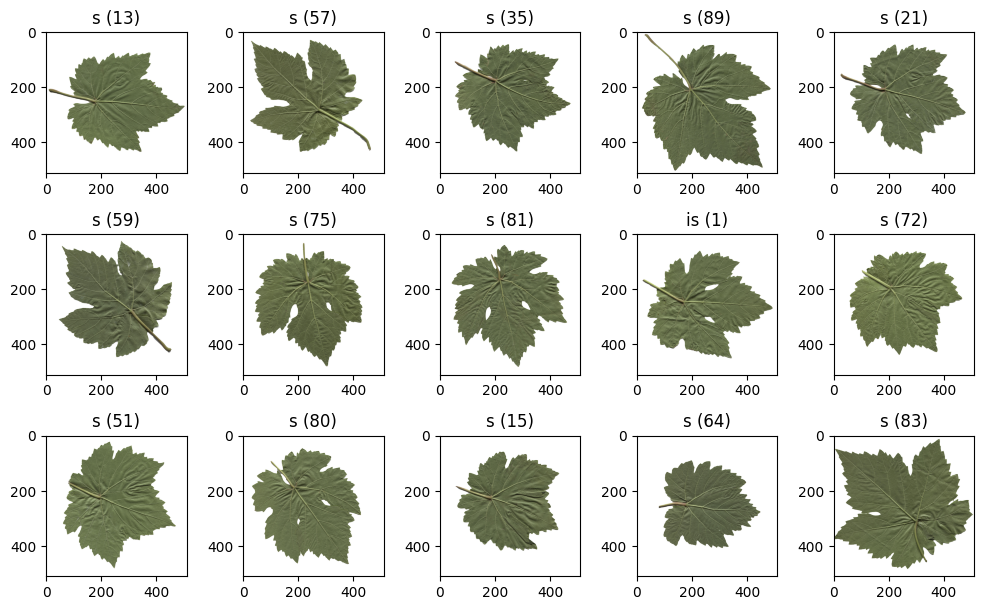

In [63]:
plot_imgs(Ala_Idris_path, 15)

# Buzgulu

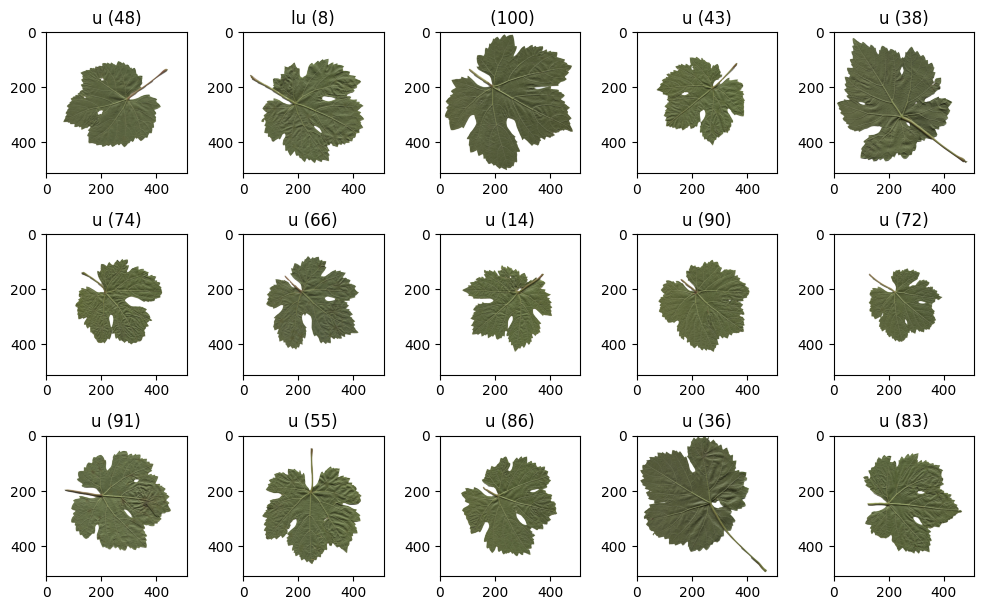

In [64]:
plot_imgs(Buzgulu_path, 15)

# Dimnit

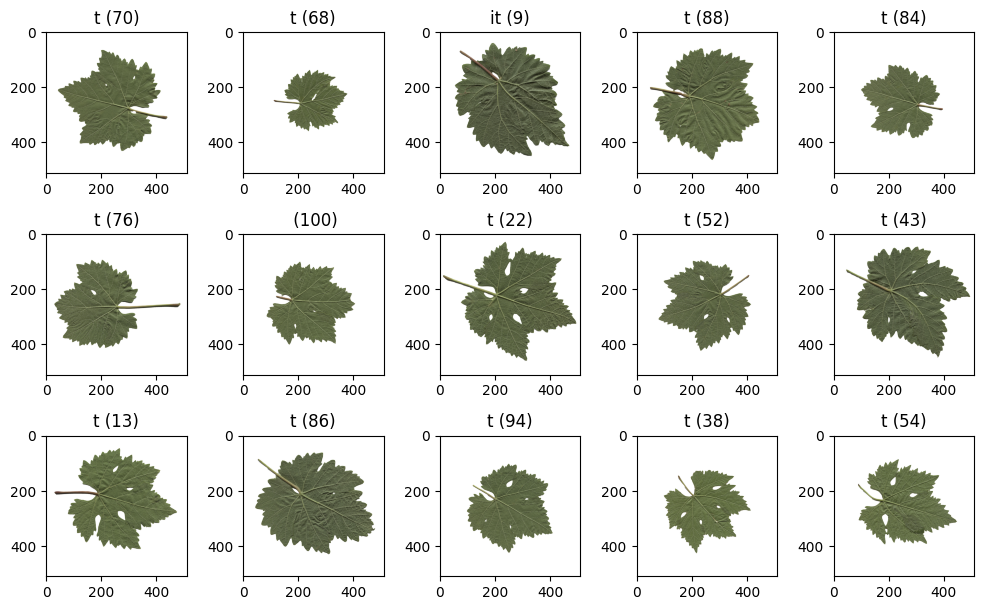

In [65]:
plot_imgs(Dimnit_path, 15)

# Nazli

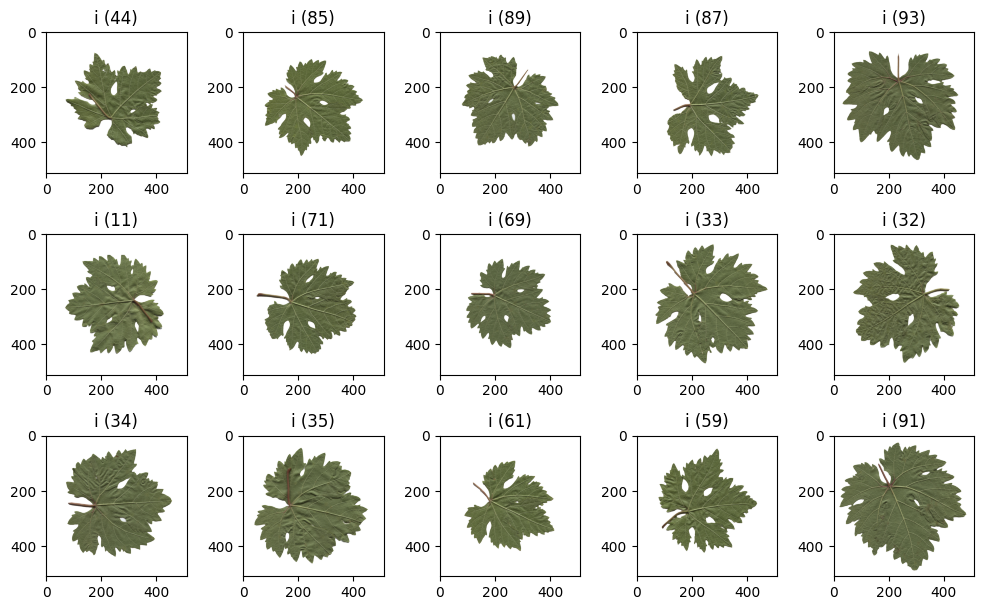

In [66]:
plot_imgs(Nazli_path, 15)

# **Augmentation**

In [67]:
main_path = "/root/.cache/kagglehub/datasets/muratkokludataset/grapevine-leaves-image-dataset/versions/1/Grapevine_Leaves_Image_Dataset"

In [68]:
image_gen_train = ImageDataGenerator(
      rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_data_gen = image_gen_train.flow_from_directory(batch_size=110,
                                                     directory=main_path,
                                                     shuffle=True,
                                                     target_size=(150,150),

                                                     class_mode="binary")

Found 500 images belonging to 5 classes.


In [69]:
image_gen_val = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen_val.flow_from_directory(batch_size=110,
                                                    directory=main_path,
                                                     shuffle=True,
                                                     target_size=(150, 150),
                                                     class_mode="binary")

Found 500 images belonging to 5 classes.


In [70]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=(['accuracy']))

In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,976,325 (26.61 MB)

 Trainable params: 6,976,325 (26.61 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history=model.fit(train_data_gen, validation_data=val_data_gen, epochs=40, batch_size=20, verbose=1,callbacks=[early_stop])

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.1993 - loss: 1.6230 - val_accuracy: 0.2000 - val_loss: 1.6089
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.2056 - loss: 1.6087 - val_accuracy: 0.2000 - val_loss: 1.6086
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.1546 - loss: 1.6113 - val_accuracy: 0.2000 - val_loss: 1.6085
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.1873 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6064
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.2051 - loss: 1.6056 - val_accuracy: 0.2600 - val_loss: 1.6004
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.2779 - loss: 1.5984 - val_accuracy: 0.3140 - val_loss: 1.5906
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.2780 - loss: 1.5846 - val_accuracy: 0.2940 - val_loss: 1.5642
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.3033 - loss: 1.5657 - val_accuracy: 0.3660 - val_loss: 1.5570
Epoch 9/

<Axes: >

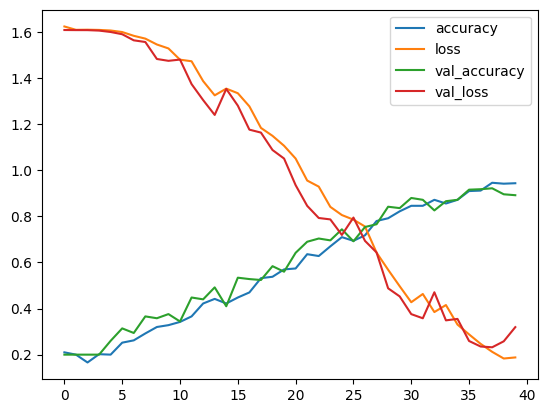

In [75]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9326 - loss: 0.2163
Test Loss: 0.2319
Test Accuracy: 0.9220
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


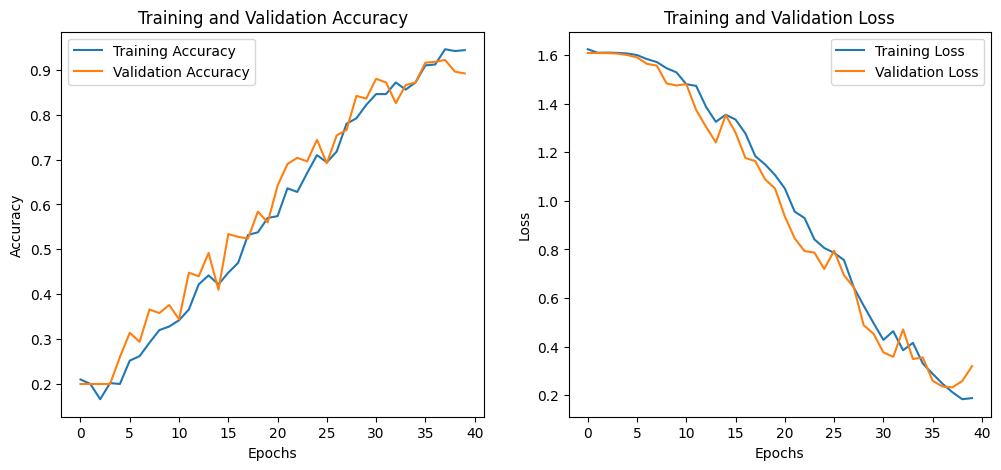

In [77]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'val_data_gen' is the test data generator or dataset
test_loss, test_accuracy = model.evaluate(val_data_gen)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test data
predictions = model.predict(val_data_gen)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = val_data_gen.classes
class_labels = list(val_data_gen.class_indices.keys())



# Plot training and validation accuracy and loss
model_loss = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(model_loss['accuracy'], label='Training Accuracy')
plt.plot(model_loss['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(model_loss['loss'], label='Training Loss')
plt.plot(model_loss['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
